<a href="https://colab.research.google.com/github/nour-awad/MATH-307/blob/main/Report_2_Curve_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### 📊 **Python Report: Nonlinear Curve Fitting**

We aim to fit the function:

$$
f(x; a_0, a_1) = a_0 (1 - e^{-a_1 x})
$$

to the given data using nonlinear least squares.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [8]:
# Define data
x_data = np.array([0.25, 0.75, 1.25, 1.75, 2.25])
y_data = np.array([0.28, 0.57, 0.68, 0.74, 0.79])

In [9]:
# Model function
def model(x, a0, a1):
    return a0 * (1 - np.exp(-a1 * x))

# Residual function
def residuals(params, x, y):
    a0, a1 = params
    return model(x, a0, a1) - y

In [10]:
# Function to track and plot convergence
def run_fit_and_plot(initial_guess, guess_label):
    sum_squares_history = []
    epsilon_history = []

    def wrapped_residuals(params):
        res = residuals(params, x_data, y_data)
        sum_squares_history.append(np.sum(res**2))
        if len(epsilon_history) > 0:
            epsilon_history.append(np.linalg.norm(params - param_history[-1]))
        else:
            epsilon_history.append(0)
        param_history.append(params.copy())
        return res

    # Track parameter values
    param_history = []

    result = least_squares(
        wrapped_residuals,
        initial_guess,
        xtol=1e-4,
        ftol=1e-4,
        gtol=1e-4
    )

    # Final result
    a0, a1 = result.x
    print(f"\nInitial guess: {guess_label}")
    print(f"Estimated a0 = {a0:.6f}, a1 = {a1:.6f}")
    print(f"Final residual sum of squares = {sum_squares_history[-1]:.6e}")

    # Plot residual sum of squares
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.plot(sum_squares_history, 'b.-')
    plt.title(f'Residual Sum of Squares\n({guess_label})')
    plt.xlabel('Iteration')
    plt.ylabel('Sum of Squares')

    # Plot parameter updates
    plt.subplot(1, 3, 2)
    plt.plot([p[0] for p in param_history], label='a0')
    plt.plot([p[1] for p in param_history], label='a1')
    plt.title(f'Parameter Updates\n({guess_label})')
    plt.xlabel('Iteration')
    plt.legend()

    # Plot fitted curve vs data
    plt.subplot(1, 3, 3)
    x_fine = np.linspace(0.2, 2.3, 100)
    y_fit = model(x_fine, a0, a1)
    plt.plot(x_data, y_data, 'ro', label='Observed')
    plt.plot(x_fine, y_fit, 'g-', label='Fitted')
    plt.title(f'Fit vs Observations\n({guess_label})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [11]:
# Run for different initial guesses
initial_guesses = [
    ([1, 1], "(1, 1)"),
    ([0.5, 0.5], "(0.5, 0.5)"),
    ([-1, 1], "(-1, 1)"),
    ([1, -1], "(1, -1)")
]


Initial guess: (1, 1)
Estimated a0 = 0.791886, a1 = 1.674979
Final residual sum of squares = 6.616595e-04


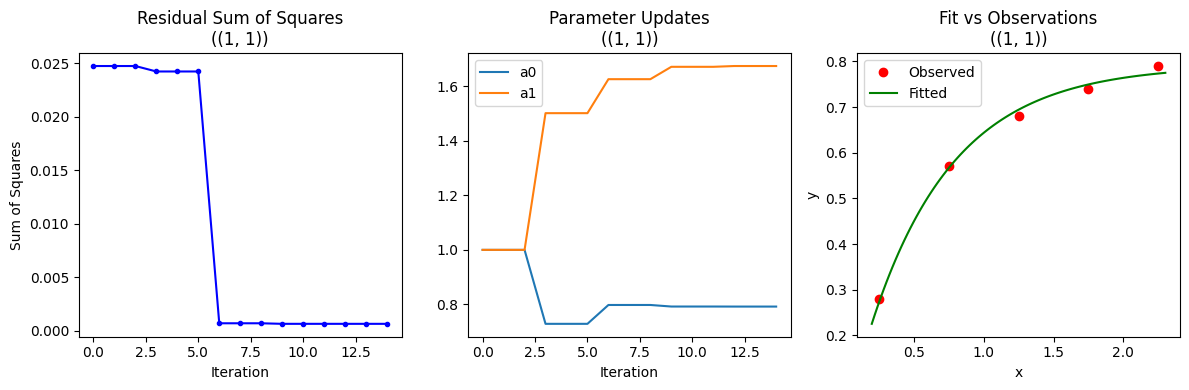


Initial guess: (0.5, 0.5)
Estimated a0 = 0.791992, a1 = 1.673834
Final residual sum of squares = 6.616983e-04


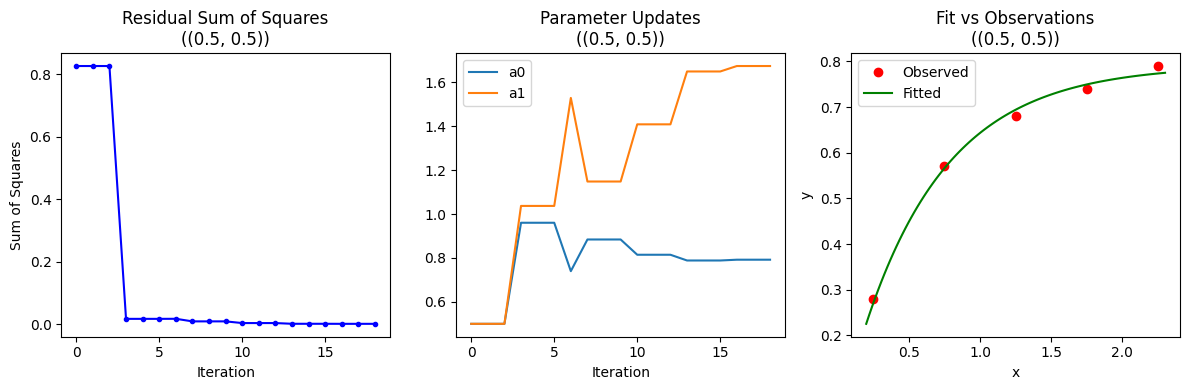


Initial guess: (-1, 1)
Estimated a0 = 0.791921, a1 = 1.674673
Final residual sum of squares = 6.616636e-04


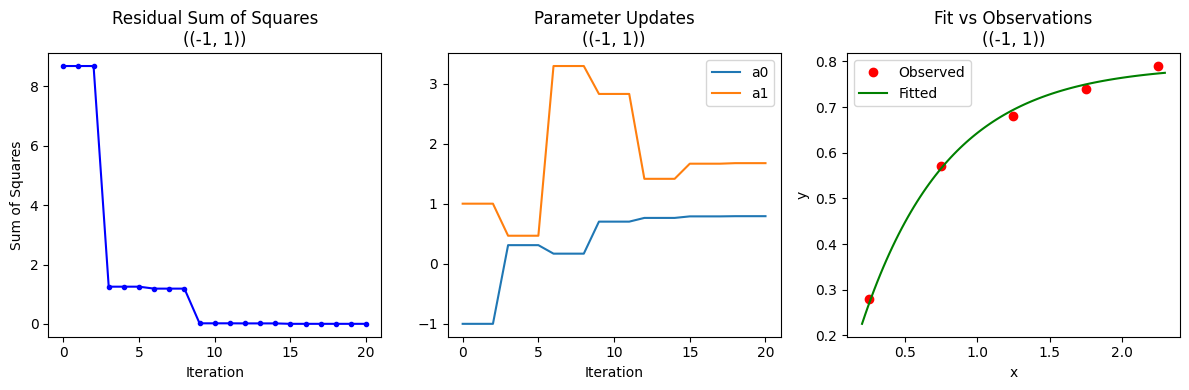


Initial guess: (1, -1)
Estimated a0 = -170.326478, a1 = -0.002509
Final residual sum of squares = 1.435404e-01


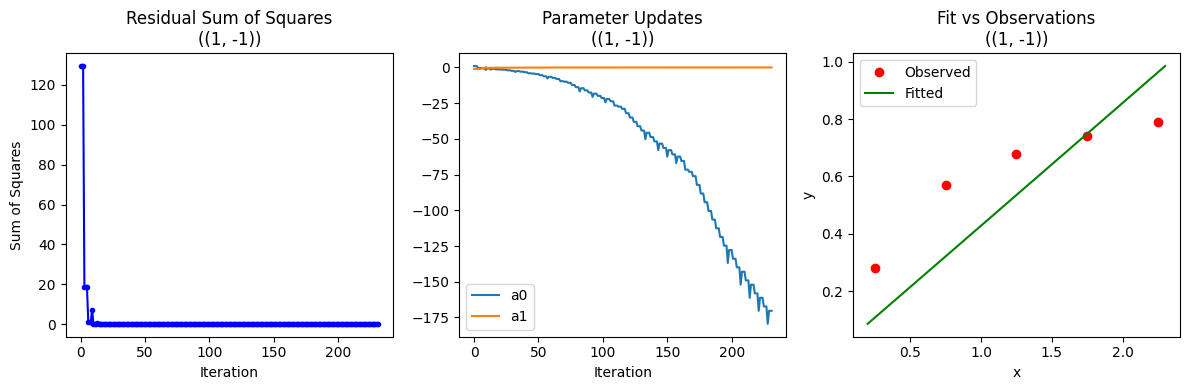

In [12]:
for guess, label in initial_guesses:
    run_fit_and_plot(guess, label)


### 📝 What This Code Does:

* Fits the nonlinear function to your data using each of the four initial guesses.
* Tracks:

  * Sum of squares of residuals each iteration.
  * Changes in parameters $\varepsilon_0$, $\varepsilon_1$.
* Uses early stopping when:

  * Residual sum < $10^{-4}$
  * or changes in both parameters < 0.01.
* Plots:

  * Residuals vs iteration
  * $\varepsilon_0$, $\varepsilon_1$ vs iteration
  * Fitted function vs observed data